<a href="https://colab.research.google.com/github/kimhwijin/korean_food_classifier/blob/master/%08korean_food_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tensorflow as tf
from tensorflow import keras
import os
from PIL import Image
import matplotlib.pyplot as plt

In [30]:
!git clone https://github.com/kimhwijin/korean_food_classifier.git

Cloning into 'korean_food_classifier'...
remote: Enumerating objects: 300, done.
remote: Counting objects: 100% (300/300), done.
remote: Compressing objects: 100% (204/204), done.
remote: Total 300 (delta 166), reused 215 (delta 92), pack-reused 0
Receiving objects: 100% (300/300), 9.65 MiB | 14.12 MiB/s, done.
Resolving deltas: 100% (166/166), done.


In [2]:
inception = keras.models.load_model("/content/drive/MyDrive/Model/kfood/PretrainedInceptionResNetV2/2022_2_1_7_8_7.hd5")

In [9]:
image_paths = os.listdir("/content")

In [64]:
image_paths = [image_path for image_path in image_paths if image_path.split(".")[-1] == "jpeg"]

In [65]:
image_paths

['아이스크림.jpeg',
 '돼지국밥.jpeg',
 '장어덮밥.jpeg',
 '파스타.jpeg',
 '연어덮밥.jpeg',
 '수육.jpeg',
 '삼겹살.jpeg',
 '쿠키.jpeg',
 '과매기.jpeg']

In [66]:
images = [tf.image.decode_image(tf.io.read_file(image_path)) for image_path in image_paths]

In [69]:
from korean_food_classifier import kfood_dataset
from korean_food_classifier.kfood_dataset import resizing_image
#images = [ for image in images]
images = [resizing_image(image, 0, False)[0] for image in images]

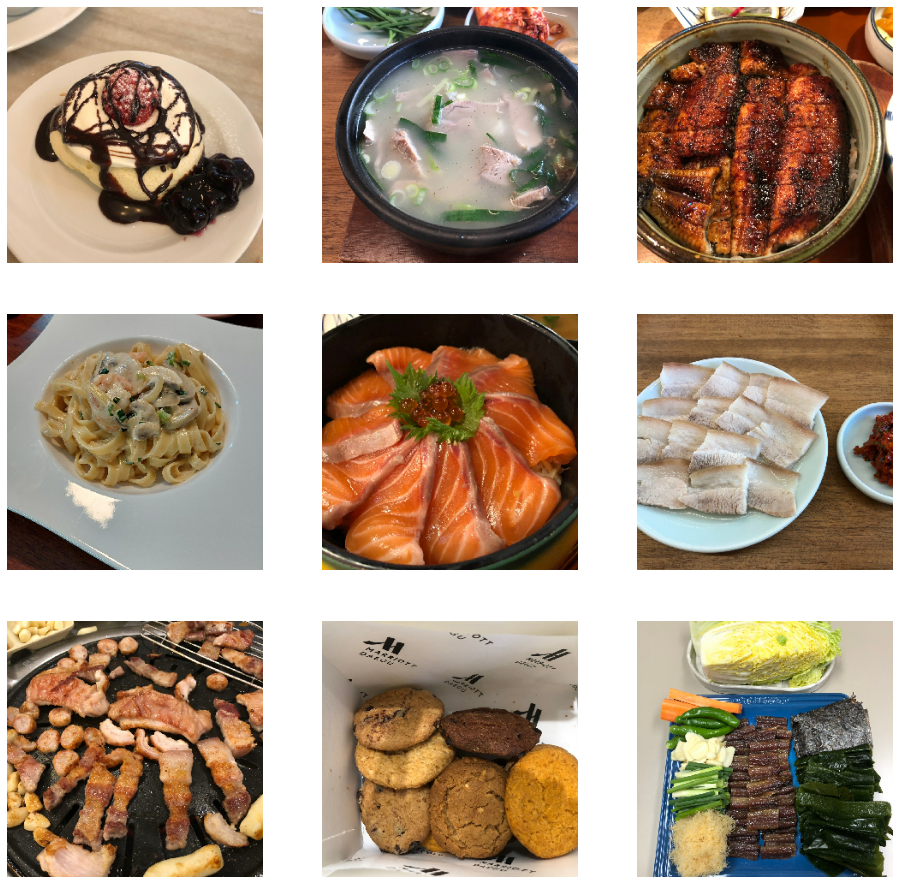

In [79]:
plt.figure(figsize=(16,16))
for i, image in enumerate(images):
    plt.subplot(3, 3, i+1)
    plt.axis("off")
    plt.imshow(image)

In [58]:
LABELS = []
CLASSES = []
with open('korean_food_classifier/class_to_label.txt','r', encoding='utf8') as f:
    for line in f.readlines():
        _label, _class = line.strip().split(',')
        LABELS.append(int(_label))
        CLASSES.append(_class)
#print(len(classes), len(labels), classes, labels)
#class_to_label = {}
#for _class, _label in zip(classes, labels):
#    class_to_label[_class] = int(_label)
LABELS = tuple(LABELS)
CLASSES = tuple(CLASSES)
if len(LABELS) == len(CLASSES):
    n_labels = len(LABELS)

In [73]:
for image in images:
    print(CLASSES[tf.argmax(inception.predict(tf.expand_dims(image, axis=0))[0])])

짜장면
곰탕_설렁탕
장어구이
짬뽕
훈제오리
편육
삼겹살
떡갈비
과메기
